In [20]:
import numpy as np
import scipy
import quspin
import matplotlib.pyplot as plt
from quspin.operators import hamiltonian as H
from quspin.basis import spin_basis_1d as sb
np.set_printoptions(suppress=True,precision=3)

We wish to get the eigenvalues and eigenvectors of the XXZ Hamiltonian to compute the level spacings, ration of consecutive level spacings and to unfold the spectrum

In [21]:
def XXZHamiltonian(L, M, J_zz, J_ch):#gives Hamiltonian in standard basis
    basis = sb(L = L, Nup = M)
    op_list_xy = [[1/4, i, i+1] for i in range(0, L-1)]
    op_list_zz = [[J_zz/4, i, i+1] for i in range (0, L-1)]

    if J_ch == 0:
        static = [["xx", op_list_xy], ["yy", op_list_xy], ["zz", op_list_zz]]

        H_XXZ = H(static, [], basis = basis)
        return H_XXZ
    else:
        op_list_xy_NNN = [[J_ch/4, i, i+2] for i in range(0, L-2)]

        static = [["xx", op_list_xy], ["yy", op_list_xy], ["zz", op_list_zz], ["xx", op_list_xy_NNN], ["yy", op_list_xy_NNN]]

        H_XXZ_NNN = H(static, [], basis = basis)
        return H_XXZ_NNN



In [22]:
L = 10
M = 5
J_zz = 0.5

basis = sb(L=L, Nup = M)
H_in = XXZHamiltonian(L, M, J_zz, 0)
H_ch = XXZHamiltonian(L, M, J_zz, 1)

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


Getting the Eigenvalues and Eigenvectors of the Integrable XXZ Hamiltonian, then computing its level spacings S, and the ratios of consecutive level spacings r

In [23]:
E_in, V_in = H_in.eigh()#eigenvalues and eigenvectors of the integrable hamiltonian
np.savetxt("CSV_Outputs/Eigenvalues/IntegrableHamiltonianL_ eigenvals"+str(L)+"M"+str(M)+".csv",E_in,delimiter = ",")
np.savetxt("CSV_Outputs/Eigenvectors/Integrable_Hamiltonian_eigenvectors"+str(L)+"M"+str(M)+".csv", V_in, delimiter = ",")

#computing the level spacings of integrable hamiltonian
S_in = []# array of level spacings
for i in range(len(E_in)-1):
    S_in.append(E_in[i+1]-E_in[i])
print(S_in)

#computing the ratios of level spacings 
r_in =[]# ratio of consecutive level spacings
for i in range(len(S_in)-1):
    r_in.append((min(S_in[i], S_in[i-1]))/(max(S_in[i], S_in[i-1])))
print(r_in)

[np.float64(0.33576050094618903), np.float64(0.3316759572394714), np.float64(0.04355309872639701), np.float64(0.2492237586879078), np.float64(0.02260721909286545), np.float64(0.03721252907480466), np.float64(0.16869048360781314), np.float64(0.0720651258996261), np.float64(0.003253144554703713), np.float64(0.01532642753886071), np.float64(0.05448439245884096), np.float64(0.047235477046075225), np.float64(0.03248219951698861), np.float64(0.06986074829171596), np.float64(0.06615194366381338), np.float64(0.017211461151434015), np.float64(0.05595104678058527), np.float64(0.0012516558772890374), np.float64(0.09364195076156534), np.float64(0.04245855791014197), np.float64(0.01795474019667842), np.float64(0.0025055229399140178), np.float64(0.06346389063634827), np.float64(0.04967735773545012), np.float64(0.02264231964997787), np.float64(0.02238342645571567), np.float64(0.016170318560307262), np.float64(3.3306690738754696e-15), np.float64(0.0016967870166313404), np.float64(0.08802224032059303),

Getting the Eigenvalues and Eigenvectors of the Chaotic XXZ Hamiltonian, then computing its level spacings S, and the ratios of consecutive level spacings r

In [24]:
#computing the eigenvalues of the Chaotic Hamiltonian
E_ch, V_ch = H_ch.eigh()
np.savetxt("CSV_Outputs/Eigenvalues/Chaotic_Hamiltonian_eigenvals"+str(L)+"M"+str(M)+".csv", E_ch, delimiter = ",")
np.savetxt("CSV_Outputs/Eigenvectors/Chaotic_Hamiltonian_eigenvectors"+str(L)+"M"+str(M)+".csv", V_ch,delimiter = ",")

#computing the level spacings of the chaotic Hamiltonian
#E_CH = sorted(E_ch)
#print(E_CH)
print(E_ch)

S_ch = []# array of level spacings
for i in range(len(E_ch)-1):
    S_ch.append(E_ch[i+1]-E_ch[i])
print(S_ch)

#computing the ratios of consecutive level spacings for the chaotic HAmiltonian
r_ch =[]# ratio of consecutive level spacings
for i in range(len(S_ch)-1):
    r_ch.append((min(S_ch[i-1], S_ch[i]))/(max(S_ch[i-1], S_ch[i])))
print(r_ch)

[-3.539 -3.088 -2.952 -2.91  -2.899 -2.875 -2.857 -2.846 -2.84  -2.833
 -2.705 -2.655 -2.604 -2.596 -2.52  -2.453 -2.425 -2.412 -2.328 -2.328
 -2.296 -2.292 -2.148 -2.136 -2.134 -2.129 -2.103 -2.088 -2.051 -2.046
 -2.037 -2.006 -1.998 -1.97  -1.91  -1.887 -1.828 -1.795 -1.793 -1.763
 -1.754 -1.722 -1.682 -1.666 -1.637 -1.629 -1.576 -1.568 -1.561 -1.515
 -1.51  -1.481 -1.452 -1.436 -1.434 -1.432 -1.388 -1.356 -1.356 -1.338
 -1.302 -1.29  -1.283 -1.279 -1.27  -1.247 -1.229 -1.215 -1.196 -1.182
 -1.177 -1.17  -1.137 -1.108 -1.09  -1.09  -1.064 -1.051 -1.018 -1.006
 -1.    -0.994 -0.983 -0.982 -0.969 -0.931 -0.93  -0.918 -0.888 -0.887
 -0.818 -0.814 -0.795 -0.785 -0.756 -0.754 -0.741 -0.731 -0.681 -0.676
 -0.664 -0.61  -0.593 -0.574 -0.57  -0.566 -0.502 -0.499 -0.494 -0.46
 -0.452 -0.441 -0.434 -0.41  -0.401 -0.396 -0.364 -0.35  -0.337 -0.299
 -0.294 -0.293 -0.254 -0.249 -0.234 -0.228 -0.225 -0.185 -0.184 -0.152
 -0.146 -0.139 -0.119 -0.096 -0.054 -0.02  -0.019 -0.011 -0.005  0.005
  0.006

Attempting to plot the ratios r for chaotic hamiltonian

(array([ 1., 10., 11., 14., 17., 25., 23., 26., 26., 22., 22., 14., 13.,
         9.,  8.,  5.,  2.,  2.,  1.,  1.]),
 array([-3.539, -3.121, -2.703, -2.285, -1.867, -1.449, -1.031, -0.613,
        -0.195,  0.223,  0.641,  1.059,  1.477,  1.895,  2.313,  2.731,
         3.149,  3.567,  3.985,  4.403,  4.821]),
 <BarContainer object of 20 artists>)

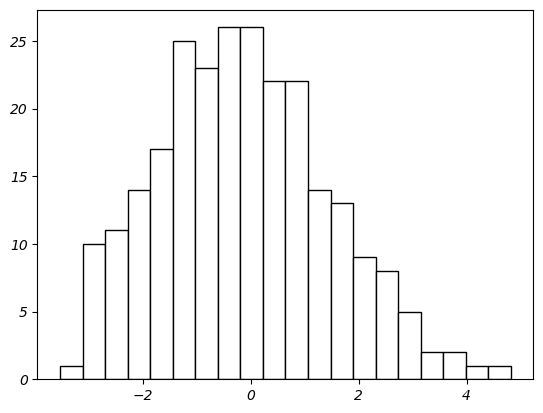

In [25]:
n_bins = 20
plt.hist(E_ch, bins = n_bins, color = "white", edgecolor = "black")

what i need to do is discard about 10% of the eigenvalues at each end of E_CH, then to split E_CH, the sorted list, into smaller sets of eigenvalues and divide each set by local_mean_s_ch$ = (E_{N+1}-E_{1})/N$, where N is the number of spacings between the N+1 eigenvalues, then plot and hopefully its gonna be the right thing

0.033175250753114026


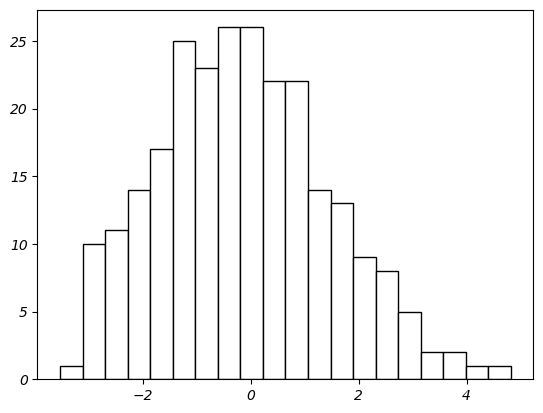

In [26]:
mean_s_ch = (E_ch[len(E_ch)-1]-E_ch[0])/len(E_ch)
E_CH = sorted(E_ch)
plt.hist(E_CH, bins = n_bins, color = "white", edgecolor = "black")
print(mean_s_ch)

THis is very Spainful, no idea how to do this yet

252
0.033175250753114026
[np.float64(0.4511887673429502), np.float64(0.13559620197151467), np.float64(0.04227770070262382), np.float64(0.010912787633908128), np.float64(0.024136669087680307), np.float64(0.018149821267463118), np.float64(0.010261865238690326), np.float64(0.006460172732997815), np.float64(0.006494338599986715), np.float64(0.12861801365918302), np.float64(0.049876787420441104), np.float64(0.05077866593088265), np.float64(0.008496944690106645), np.float64(0.07581120973075794), np.float64(0.06729173517117815), np.float64(0.027293290719046404), np.float64(0.012925914007022588), np.float64(0.08447250962398645), np.float64(0.00018154059896735575), np.float64(0.03186352093836664), np.float64(0.00426606831547538), np.float64(0.14381212882446626), np.float64(0.011298218246139413), np.float64(0.0023145919416176497), np.float64(0.004862055784500274), np.float64(0.025794800117822092), np.float64(0.0158232535043501), np.float64(0.03649491972526375), np.float64(0.00536101752570417), n

(array([27., 30., 17., 23., 15., 11., 16., 13., 10.,  9.,  8., 18.,  8.,
         5., 10.,  7.,  6.,  7.,  5.,  5.]),
 array([0.002, 0.052, 0.101, 0.151, 0.201, 0.25 , 0.3  , 0.35 , 0.399,
        0.449, 0.498, 0.548, 0.598, 0.647, 0.697, 0.747, 0.796, 0.846,
        0.895, 0.945, 0.995]),
 <BarContainer object of 20 artists>)

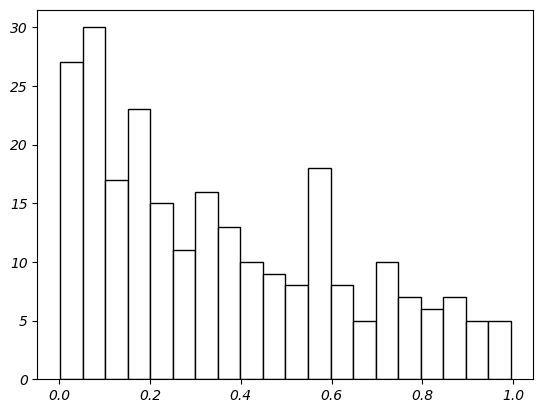

In [27]:
print(len(E_CH))
mean_s_ch = (E_CH[len(E_CH)-1]-E_CH[0])/len(E_CH)
print(mean_s_ch)
n_bins = 20

#plt.hist(E_CH , bins = n_bins, color = "white", edgecolor = "black")

S_ch = []# array of level spacings
for i in range(len(E_ch)-1):
    S_ch.append(E_ch[i+1]-E_ch[i])
print(S_ch)

#computing the ratios of consecutive level spacings for the chaotic HAmiltonian
r_ch =[]# ratio of consecutive level spacings
for i in range(len(S_ch)-1):
    r_ch.append((min(S_ch[i-1], S_ch[i]))/(max(S_ch[i-1], S_ch[i])))
print(r_ch)

plt.hist(r_ch, bins = n_bins, color = "white", edgecolor = "black")

Unfolding the spectrum

-sort spectrum for increasing energy

-discard values at the start and end of the spectrum

-seperate into bins

-divide each eigenvalue by the mean level spacing to renormalise